In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

import tensorflow as tf
import keras

from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#from sklearn.metrics import confusion_matrix, accuracy_score

import sklearn
%matplotlib inline

In [2]:
#data = pd.read_csv("~/datacsv/Churn_Modelling.csv")
#data = pd.read_csv("~/datacsv/Bengaluru_House_Data.csv")
data = pd.read_csv("~/datacsv/melb_data.csv") #melburn housing dataset

data

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [4]:
data.shape

(13580, 21)

In [5]:
df1 = data.describe()
df1

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [6]:
df1.columns

Index(['Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude',
       'Propertycount'],
      dtype='object')

In [7]:
data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [8]:
data.groupby("CouncilArea")["CouncilArea"].agg("count")

CouncilArea
Banyule               594
Bayside               489
Boroondara           1160
Brimbank              424
Cardinia                8
Casey                  38
Darebin               934
Frankston              53
Glen Eira             848
Greater Dandenong      52
Hobsons Bay           434
Hume                  164
Kingston              207
Knox                   80
Macedon Ranges          7
Manningham            311
Maribyrnong           692
Maroondah              80
Melbourne             470
Melton                 66
Monash                333
Moonee Valley         997
Moorabool               1
Moreland             1163
Nillumbik              36
Port Phillip          628
Stonnington           719
Unavailable             1
Whitehorse            304
Whittlesea            167
Wyndham                86
Yarra                 647
Yarra Ranges           18
Name: CouncilArea, dtype: int64

In [9]:
data2 = data.drop(['Address', 'SellerG', 'Date', 'Propertycount'], axis=1)
data2

,Suburb,Rooms,Type,Price,Method,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname
0,Abbotsford,2,h,1480000.0,S,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan
1,Abbotsford,2,h,1035000.0,S,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan
2,Abbotsford,3,h,1465000.0,SP,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan
3,Abbotsford,3,h,850000.0,PI,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan
4,Abbotsford,4,h,1600000.0,VB,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,4,h,1245000.0,S,16.7,3150.0,4.0,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan
13576,Williamstown,3,h,1031000.0,SP,6.8,3016.0,3.0,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan
13577,Williamstown,3,h,1170000.0,S,6.8,3016.0,3.0,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan
13578,Williamstown,4,h,2500000.0,PI,6.8,3016.0,4.0,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan


In [10]:
data2.groupby("Suburb")["Suburb"].agg("count")

Suburb
Abbotsford       56
Aberfeldie       44
Airport West     67
Albanvale         6
Albert Park      69
               ... 
Wonga Park        1
Wyndham Vale      4
Yallambie        24
Yarra Glen        1
Yarraville      164
Name: Suburb, Length: 314, dtype: int64

In [11]:
data2.groupby("Type")["Type"].agg("count")

Type
h    9449
t    1114
u    3017
Name: Type, dtype: int64

In [12]:
data2.groupby("Regionname")["Regionname"].agg("count")

Regionname
Eastern Metropolitan          1471
Eastern Victoria                53
Northern Metropolitan         3890
Northern Victoria               41
South-Eastern Metropolitan     450
Southern Metropolitan         4695
Western Metropolitan          2948
Western Victoria                32
Name: Regionname, dtype: int64

In [13]:
data2.isnull().sum()

Suburb             0
Rooms              0
Type               0
Price              0
Method             0
Distance           0
Postcode           0
Bedroom2           0
Bathroom           0
Car               62
Landsize           0
BuildingArea    6450
YearBuilt       5375
CouncilArea     1369
Lattitude          0
Longtitude         0
Regionname         0
dtype: int64

In [14]:
data2['Car']=data2['Car'].fillna(data2['Car'].mean())
data2['BuildingArea']=data2['BuildingArea'].fillna(data2['BuildingArea'].mean())
data2['YearBuilt']=data2['YearBuilt'].fillna(data2['YearBuilt'].mean())

In [15]:
data2.isnull().sum()

Suburb             0
Rooms              0
Type               0
Price              0
Method             0
Distance           0
Postcode           0
Bedroom2           0
Bathroom           0
Car                0
Landsize           0
BuildingArea       0
YearBuilt          0
CouncilArea     1369
Lattitude          0
Longtitude         0
Regionname         0
dtype: int64

In [16]:
data2 = data2.drop_duplicates()

In [17]:
data2 = data2.dropna()

In [18]:
data2.isnull().sum()

Suburb          0
Rooms           0
Type            0
Price           0
Method          0
Distance        0
Postcode        0
Bedroom2        0
Bathroom        0
Car             0
Landsize        0
BuildingArea    0
YearBuilt       0
CouncilArea     0
Lattitude       0
Longtitude      0
Regionname      0
dtype: int64

In [19]:
data2.shape

(12194, 17)

In [20]:
data2

,Suburb,Rooms,Type,Price,Method,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname
0,Abbotsford,2,h,1480000.0,S,2.5,3067.0,2.0,1.0,1.0,202.0,151.96765,1964.684217,Yarra,-37.79960,144.99840,Northern Metropolitan
1,Abbotsford,2,h,1035000.0,S,2.5,3067.0,2.0,1.0,0.0,156.0,79.00000,1900.000000,Yarra,-37.80790,144.99340,Northern Metropolitan
2,Abbotsford,3,h,1465000.0,SP,2.5,3067.0,3.0,2.0,0.0,134.0,150.00000,1900.000000,Yarra,-37.80930,144.99440,Northern Metropolitan
3,Abbotsford,3,h,850000.0,PI,2.5,3067.0,3.0,2.0,1.0,94.0,151.96765,1964.684217,Yarra,-37.79690,144.99690,Northern Metropolitan
4,Abbotsford,4,h,1600000.0,VB,2.5,3067.0,3.0,1.0,2.0,120.0,142.00000,2014.000000,Yarra,-37.80720,144.99410,Northern Metropolitan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12208,Williamstown,3,h,1285000.0,S,6.8,3016.0,3.0,1.0,0.0,296.0,151.96765,1964.684217,Hobsons Bay,-37.86335,144.89487,Western Metropolitan
12209,Windsor,2,u,560000.0,PI,4.6,3181.0,2.0,1.0,1.0,0.0,61.60000,2012.000000,Stonnington,-37.85581,144.99025,Southern Metropolitan
12210,Wollert,3,h,525300.0,S,25.5,3750.0,3.0,2.0,2.0,400.0,151.96765,1964.684217,Whittlesea,-37.61387,145.03850,Northern Metropolitan
12211,Yarraville,2,h,750000.0,SP,6.3,3013.0,2.0,1.0,2.0,269.0,151.96765,1964.684217,Maribyrnong,-37.81649,144.86731,Western Metropolitan


In [21]:
#data2['Suburb'].unique()

In [22]:
data2['Method'].unique()

array(['S', 'SP', 'PI', 'VB', 'SA'], dtype=object)

In [23]:
data2['Type'].unique()

array(['h', 'u', 't'], dtype=object)

Text(0, 0.5, 'Count')

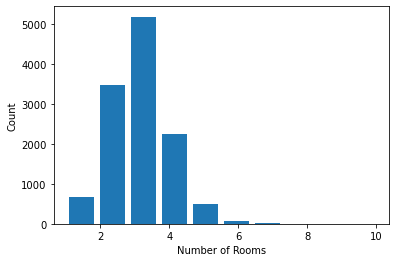

In [24]:
plt.hist(data2.Rooms,rwidth=0.8)
plt.xlabel("Number of Rooms")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

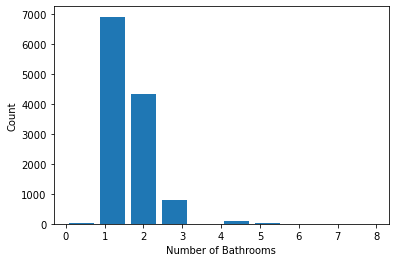

In [25]:
plt.hist(data2.Bathroom,rwidth=0.8)
plt.xlabel("Number of Bathrooms")
plt.ylabel("Count")

In [26]:
#data3=data2.drop(['Suburb','Type', 'Method', "Regionname"],axis='columns')

data2

,Suburb,Rooms,Type,Price,Method,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname
0,Abbotsford,2,h,1480000.0,S,2.5,3067.0,2.0,1.0,1.0,202.0,151.96765,1964.684217,Yarra,-37.79960,144.99840,Northern Metropolitan
1,Abbotsford,2,h,1035000.0,S,2.5,3067.0,2.0,1.0,0.0,156.0,79.00000,1900.000000,Yarra,-37.80790,144.99340,Northern Metropolitan
2,Abbotsford,3,h,1465000.0,SP,2.5,3067.0,3.0,2.0,0.0,134.0,150.00000,1900.000000,Yarra,-37.80930,144.99440,Northern Metropolitan
3,Abbotsford,3,h,850000.0,PI,2.5,3067.0,3.0,2.0,1.0,94.0,151.96765,1964.684217,Yarra,-37.79690,144.99690,Northern Metropolitan
4,Abbotsford,4,h,1600000.0,VB,2.5,3067.0,3.0,1.0,2.0,120.0,142.00000,2014.000000,Yarra,-37.80720,144.99410,Northern Metropolitan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12208,Williamstown,3,h,1285000.0,S,6.8,3016.0,3.0,1.0,0.0,296.0,151.96765,1964.684217,Hobsons Bay,-37.86335,144.89487,Western Metropolitan
12209,Windsor,2,u,560000.0,PI,4.6,3181.0,2.0,1.0,1.0,0.0,61.60000,2012.000000,Stonnington,-37.85581,144.99025,Southern Metropolitan
12210,Wollert,3,h,525300.0,S,25.5,3750.0,3.0,2.0,2.0,400.0,151.96765,1964.684217,Whittlesea,-37.61387,145.03850,Northern Metropolitan
12211,Yarraville,2,h,750000.0,SP,6.3,3013.0,2.0,1.0,2.0,269.0,151.96765,1964.684217,Maribyrnong,-37.81649,144.86731,Western Metropolitan


In [27]:
dummies=pd.get_dummies(data2.Method)
dummies

,PI,S,SA,SP,VB
0,0,1,0,0,0
1,0,1,0,0,0
2,0,0,0,1,0
3,1,0,0,0,0
4,0,0,0,0,1
...,...,...,...,...,...
12208,0,1,0,0,0
12209,1,0,0,0,0
12210,0,1,0,0,0
12211,0,0,0,1,0


In [28]:
data2=pd.concat([data2,dummies],axis='columns')
#data2

In [29]:
dummies=pd.get_dummies(data2.Type)
dummies


,h,t,u
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
12208,1,0,0
12209,0,0,1
12210,1,0,0
12211,1,0,0


In [30]:
data2=pd.concat([data2,dummies],axis='columns')

In [31]:
dummies=pd.get_dummies(data2.Regionname)
dummies

,Eastern Metropolitan,Eastern Victoria,Northern Metropolitan,Northern Victoria,South-Eastern Metropolitan,Southern Metropolitan,Western Metropolitan,Western Victoria
0,0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0,0
2,0,0,1,0,0,0,0,0
3,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...
12208,0,0,0,0,0,0,1,0
12209,0,0,0,0,0,1,0,0
12210,0,0,1,0,0,0,0,0
12211,0,0,0,0,0,0,1,0


In [32]:
data2=pd.concat([data2,dummies],axis='columns')
#data2

In [33]:
dummies=pd.get_dummies(data2.CouncilArea)
dummies

,Banyule,Bayside,Boroondara,Brimbank,Cardinia,Casey,Darebin,Frankston,Glen Eira,Greater Dandenong,...,Moreland,Nillumbik,Port Phillip,Stonnington,Unavailable,Whitehorse,Whittlesea,Wyndham,Yarra,Yarra Ranges
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12208,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12209,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
12210,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
12211,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
data2=pd.concat([data2,dummies],axis='columns')

In [35]:
data2=data2.drop(['Type','Method', 'Regionname', 'CouncilArea', 'Suburb'],axis='columns')

data2

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,...,Moreland,Nillumbik,Port Phillip,Stonnington,Unavailable,Whitehorse,Whittlesea,Wyndham,Yarra,Yarra Ranges
0,2,1480000.0,2.5,3067.0,2.0,1.0,1.0,202.0,151.96765,1964.684217,...,0,0,0,0,0,0,0,0,1,0
1,2,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.00000,1900.000000,...,0,0,0,0,0,0,0,0,1,0
2,3,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,150.00000,1900.000000,...,0,0,0,0,0,0,0,0,1,0
3,3,850000.0,2.5,3067.0,3.0,2.0,1.0,94.0,151.96765,1964.684217,...,0,0,0,0,0,0,0,0,1,0
4,4,1600000.0,2.5,3067.0,3.0,1.0,2.0,120.0,142.00000,2014.000000,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12208,3,1285000.0,6.8,3016.0,3.0,1.0,0.0,296.0,151.96765,1964.684217,...,0,0,0,0,0,0,0,0,0,0
12209,2,560000.0,4.6,3181.0,2.0,1.0,1.0,0.0,61.60000,2012.000000,...,0,0,0,1,0,0,0,0,0,0
12210,3,525300.0,25.5,3750.0,3.0,2.0,2.0,400.0,151.96765,1964.684217,...,0,0,0,0,0,0,1,0,0,0
12211,2,750000.0,6.3,3013.0,2.0,1.0,2.0,269.0,151.96765,1964.684217,...,0,0,0,0,0,0,0,0,0,0


In [36]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12194 entries, 0 to 12212
Data columns (total 61 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Rooms                       12194 non-null  int64  
 1   Price                       12194 non-null  float64
 2   Distance                    12194 non-null  float64
 3   Postcode                    12194 non-null  float64
 4   Bedroom2                    12194 non-null  float64
 5   Bathroom                    12194 non-null  float64
 6   Car                         12194 non-null  float64
 7   Landsize                    12194 non-null  float64
 8   BuildingArea                12194 non-null  float64
 9   YearBuilt                   12194 non-null  float64
 10  Lattitude                   12194 non-null  float64
 11  Longtitude                  12194 non-null  float64
 12  PI                          12194 non-null  uint8  
 13  S                           121

In [37]:
x=data2.drop('Price',axis='columns')
x.head()

,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,...,Moreland,Nillumbik,Port Phillip,Stonnington,Unavailable,Whitehorse,Whittlesea,Wyndham,Yarra,Yarra Ranges
0,2,2.5,3067.0,2.0,1.0,1.0,202.0,151.96765,1964.684217,-37.7996,...,0,0,0,0,0,0,0,0,1,0
1,2,2.5,3067.0,2.0,1.0,0.0,156.0,79.00000,1900.000000,-37.8079,...,0,0,0,0,0,0,0,0,1,0
2,3,2.5,3067.0,3.0,2.0,0.0,134.0,150.00000,1900.000000,-37.8093,...,0,0,0,0,0,0,0,0,1,0
3,3,2.5,3067.0,3.0,2.0,1.0,94.0,151.96765,1964.684217,-37.7969,...,0,0,0,0,0,0,0,0,1,0
4,4,2.5,3067.0,3.0,1.0,2.0,120.0,142.00000,2014.000000,-37.8072,...,0,0,0,0,0,0,0,0,1,0


In [38]:
y=data2['Price']
y.head()

0    1480000.0
1    1035000.0
2    1465000.0
3     850000.0
4    1600000.0
Name: Price, dtype: float64

In [39]:
#x = data2.iloc[:,0:7].values
#y=data2.iloc[:,7].values

In [40]:
x.shape

(12194, 60)

In [41]:
y.shape

(12194,)

In [42]:
# splitting the training & test sets:

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.2)

In [43]:
x_train.shape ,x_test.shape, y_train.shape ,y_test.shape

((9755, 60), (2439, 60), (9755,), (2439,))

In [44]:

# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
mc=MinMaxScaler()
x_train = mc.fit_transform( x_train)
X_test = mc.fit_transform( x_test)

In [45]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [46]:
# Initialize the model
model=Sequential()

# Build input layer & Hidden layer
model.add(Dense(units=240, activation='relu', input_dim=60))
model.add(Dropout(rate=0.1))


In [47]:
# Building second layer
model.add(Dense(units=120,activation ='relu'))
model.add(Dropout(rate=0.2))

In [48]:
# Building third layer
model.add(Dense(units=60,activation ='relu'))
model.add(Dropout(rate=0.3))

In [49]:
#Adding outer layer
model.add(Dense(units = 1, activation='linear'))

In [50]:
model.compile(optimizer='adam', loss='mae')

#Fit model:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping_minitor = EarlyStopping(patience=100)

#train model:
history = model.fit(x_train, y_train,
 epochs=300,
 batch_size=32,
 validation_split=0.2,
 callbacks=[early_stopping_minitor])


Epoch 1/300
244/244 [==============================] - 1s 2ms/step - loss: 995974.2500 - val_loss: 740830.5000
Epoch 2/300
244/244 [==============================] - 0s 1ms/step - loss: 447720.0312 - val_loss: 401468.6562
Epoch 3/300
244/244 [==============================] - 0s 1ms/step - loss: 378034.1875 - val_loss: 363031.8750
Epoch 4/300
244/244 [==============================] - 0s 1ms/step - loss: 342209.0938 - val_loss: 330665.0625
Epoch 5/300
244/244 [==============================] - 0s 1ms/step - loss: 321261.6250 - val_loss: 311421.3750
Epoch 6/300
244/244 [==============================] - 0s 1ms/step - loss: 304720.0938 - val_loss: 297831.7500
Epoch 7/300
244/244 [==============================] - 0s 1ms/step - loss: 299323.3438 - val_loss: 290387.2188
Epoch 8/300
244/244 [==============================] - 0s 1ms/step - loss: 290536.3750 - val_loss: 284259.5000
Epoch 9/300
244/244 [==============================] - 0s 1ms/step - loss: 286901.2188 - val_loss: 280897.9062
E

In [51]:
y_pred = model.predict(x_test)


77/77 [==============================] - 0s 576us/step


dict_keys(['loss', 'val_loss'])


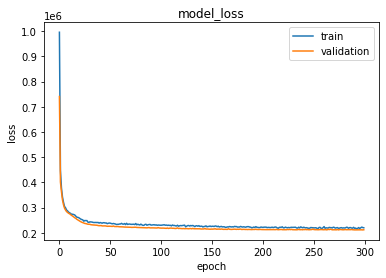

In [52]:
# Plot loss of train and test set
print(history.history.keys())

#Loss in train and test:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [53]:
#evaluate the result
print('Evaluation on test data')
results = model.evaluate(x_train, y_train)
print('mae: ', results)

Evaluation on test data
305/305 [==============================] - 0s 614us/step - loss: 194085.0312
mae:  194085.03125


In [54]:
data2.Price.describe()

count    1.219400e+04
mean     1.063858e+06
std      6.390848e+05
min      8.500000e+04
25%      6.400000e+05
50%      8.950000e+05
75%      1.320000e+06
max      9.000000e+06
Name: Price, dtype: float64

In [55]:
data2.Price.mean()

1063858.377890766

In [57]:
#mae/mean ratio : 18%
194085/1063858

0.1824350618221605